C:\Users\ACER\AppData\Local\Temp\ipykernel_12320\922552821.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace(mapping)


Decision Tree (Textual Representation):
|--- student <= 0.50
|   |--- age <= 0.50
|   |   |--- class: 0
|   |--- age >  0.50
|   |   |--- age <= 1.50
|   |   |   |--- class: 1
|   |   |--- age >  1.50
|   |   |   |--- credit_rating <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- credit_rating >  0.50
|   |   |   |   |--- class: 0
|--- student >  0.50
|   |--- credit_rating <= 0.50
|   |   |--- class: 1
|   |--- credit_rating >  0.50
|   |   |--- age <= 1.50
|   |   |   |--- class: 1
|   |   |--- age >  1.50
|   |   |   |--- class: 0



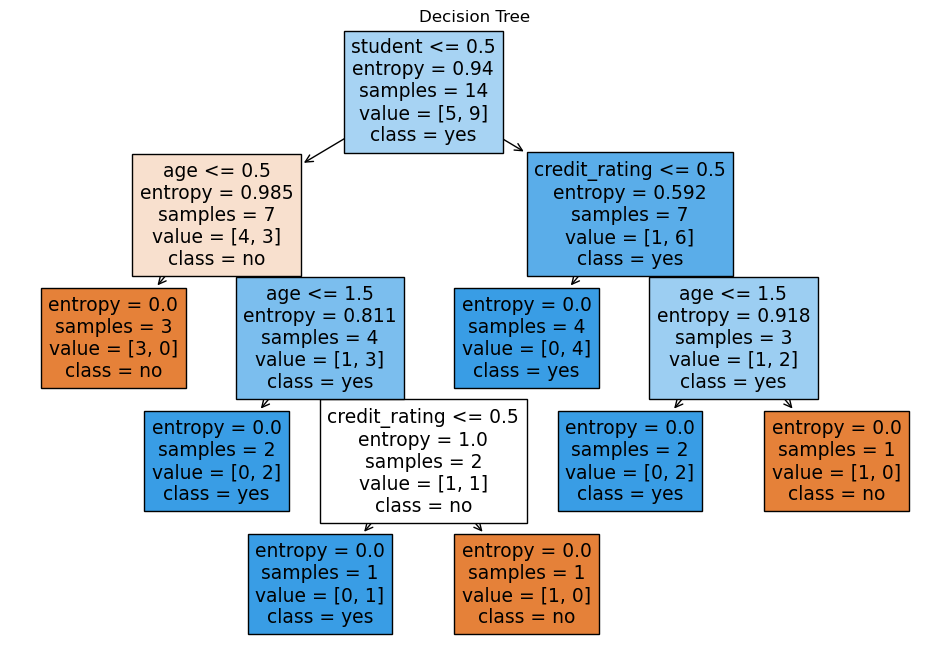

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

df.to_csv('decision_tree_data.csv', index=False)

mapping = {
    'age': {'<=30': 0, '31...40': 1, '>40': 2},
    'income': {'low': 0, 'medium': 1, 'high': 2},
    'student': {'no': 0, 'yes': 1},
    'credit_rating': {'fair': 0, 'excellent': 1},
    'buys_computer': {'no': 0, 'yes': 1}
}

df_encoded = df.replace(mapping)

df_encoded = df_encoded.astype(int)

X = df_encoded.drop('buys_computer', axis=1)
y = df_encoded['buys_computer']

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

print("Decision Tree (Textual Representation):")
print(export_text(clf, feature_names=list(X.columns)))

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['no', 'yes'], filled=True)
plt.title("Decision Tree")
plt.show()
